In [1]:
import matplotlib.pyplot as plt
import polars as pl
import polars.selectors as cs

from trendfilterpy._estimator import TrendFilterRegression

In [17]:
df = pl.read_csv("data/Housing.csv").with_columns(cs.string().cast(pl.Categorical))
model = TrendFilterRegression(lam=2)
model.fit(
    df.select(pl.col("area", "bedrooms", "bathrooms", "stories", "parking"), cs.categorical().to_physical()),
    df["price"].log(),
    categorical_features=[5, 6, 7, 8, 9, 10, 11],
)

TrendFilterRegression(lam=2)

Text(0, 0.5, 'Linear Predictor')

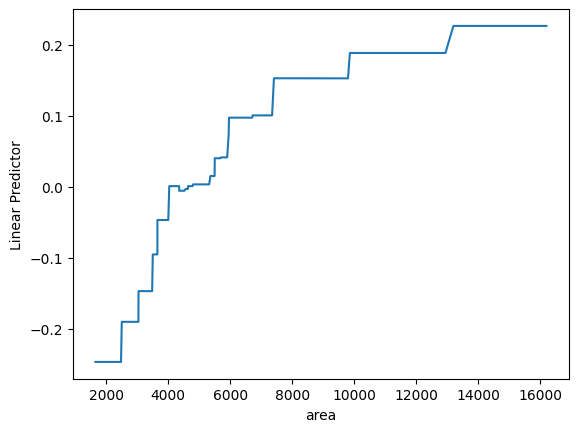

In [18]:
var = model.vars_[0]
plt.plot(var.unique_vals, var.beta)
plt.xlabel(var.name)
plt.ylabel("Linear Predictor")

In [19]:
model.score(
    df.select(pl.col("area", "bedrooms", "bathrooms", "stories", "parking"), cs.categorical().to_physical()),
    df.select(pl.col("price").log()),
)

0.7213660250761281